In [90]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [91]:
#Loading the dataset

In [92]:
df = pd.read_excel('Monthly_CO2_Concentrations.xlsx')

In [93]:
df.head(10)

,CO2,Year,Month
0,333.13,1974.0,5.0
1,332.09,1974.0,6.0
2,331.10,1974.0,7.0
3,329.14,1974.0,8.0
4,327.36,1974.0,9.0
5,327.29,1974.0,10.0
6,328.23,1974.0,11.0
7,329.55,1974.0,12.0
8,NaN,NaN,NaN
9,330.62,1975.0,1.0


In [94]:
#removing NaN values

In [95]:
df = df.loc[(~pd.isnull(df['CO2']))&\
            (~pd.isnull(df['Year']))&\
            (~pd.isnull(df['Month']))]

In [96]:
df.sort_values(['Year', 'Month'], inplace=True)

<AxesSubplot:>

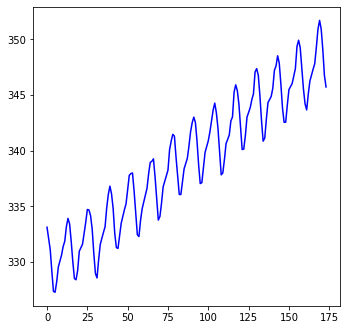

In [97]:
plt.figure(figsize=(5.5, 5.5))
df['CO2'].plot(color='b')

<AxesSubplot:>

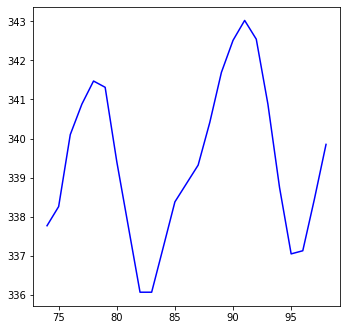

In [98]:
plt.figure(figsize=(5.5, 5.5))
dd=df['CO2'].loc[(df['Year']==1980) | (df['Year']==1981)]
dd.plot(color='b')

In [99]:
#Trendline

In [100]:
from sklearn.linear_model import LinearRegression

In [102]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)

In [103]:
trend_model.fit(np.arange(df.shape[0]).reshape((-1,1)), df['CO2'])

LinearRegression(normalize=True)

In [104]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_))

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


In [105]:
trendline = trend_model.predict(np.arange(df.shape[0]).reshape((-1,1)))

<AxesSubplot:>

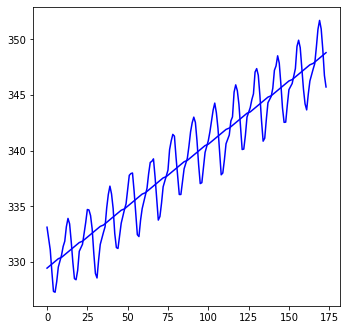

In [106]:
plt.figure(figsize=(5.5, 5.5))
df['CO2'].plot(color='b')
pd.Series(data=trendline, index=df.index).plot(color='b')

In [107]:
residuals = np.array(df['CO2']) - trend_model.predict(np.arange(df.shape[0]).reshape((-1,1)))

<AxesSubplot:>

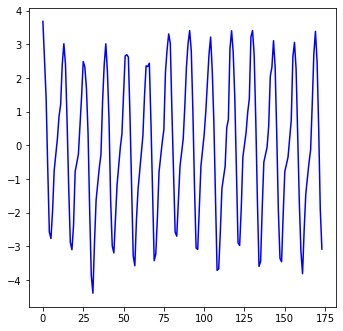

In [109]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=df.index).plot(color='b')

In [110]:
#Seasonality

In [111]:
df['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
df['Quarter'] = df['Month'].map(lambda m: month_quarter_map.get(m))

In [113]:
seasonal_sub_series_data = df.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [115]:
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']

<AxesSubplot:>

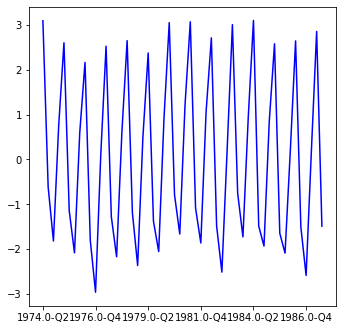

In [116]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')

<AxesSubplot:>

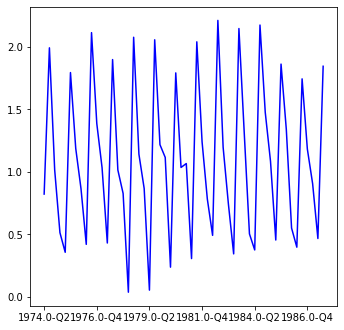

In [117]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')

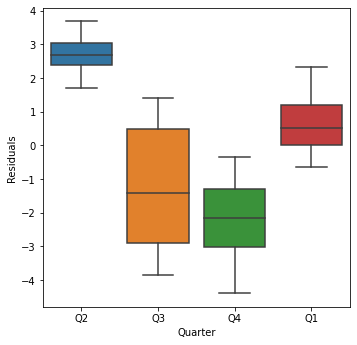

In [121]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=df, y='Residuals', x='Quarter')